In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#read in csv
survey_data_path = "survey_data_cleaned.csv"
survey_data = pd.read_csv(survey_data_path)

In [3]:
#create dataframe
survey_df = pd.DataFrame(survey_data)
survey_df.head()

,ID_number,timestamp,age,gender,relationship_status,occupation_status,org_affiliations,use_social_media,facebook,twitter,...,difficult_to_concentrate,compare_self_to_others,feel_about_comparisons,seek_validation,feel_depressed,interest_in_daily_activ,sleep_issues,depression_construct,inattentive_construct,valid_seek_construct
0,1,4/18/2022 19:18,21.0,Male,In a relationship,University Student,University,Yes,Yes,Yes,...,5,2,3,2,5,4,5,11,13,7
1,2,4/18/2022 19:19,21.0,Female,Single,University Student,University,Yes,Yes,Yes,...,4,5,1,1,5,4,5,14,11,7
2,3,4/18/2022 19:25,21.0,Female,Single,University Student,University,Yes,Yes,No,...,4,3,3,1,4,2,5,11,8,7
3,4,4/18/2022 19:29,21.0,Female,Single,University Student,University,Yes,Yes,No,...,3,5,1,2,4,3,2,12,8,8
4,5,4/18/2022 19:33,21.0,Female,Single,University Student,University,Yes,Yes,No,...,5,3,3,3,4,4,1,13,14,9


In [4]:
#count of null
#conclusion: only null in org_affiliations. not of concern.
nan_count = survey_df.isnull().sum()
print(f"number of NaN values{nan_count}")

number of NaN valuesID_number                            0
timestamp                            0
age                                  0
gender                               0
relationship_status                  0
occupation_status                    0
org_affiliations                    30
use_social_media                     0
facebook                             0
twitter                              0
instagram                            0
youtube                              0
snapchat                             0
discord                              0
reddit                               0
pinterest                            0
tiktok                               0
avg_time_per_day                     0
how_often_use_sm_without_purpose     0
how_often_distracted_by_sm           0
feel_restless_wo_sm                  0
how_easily_distracted                0
bothered_by_worries                  0
difficult_to_concentrate             0
compare_self_to_others               0
feel_

In [5]:
#create variable to hold gender count
gender_check = survey_df["gender"].value_counts()
gender_check

gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [6]:
NB_variations = ["Nonbinary","NB","unsure","There are others???", "Non binary"]

survey_df["gender"] = survey_df["gender"].str.strip()

for variation in NB_variations:
    survey_df.loc[survey_df["gender"] == variation, "gender"] = "Non-binary"

In [7]:
gender = survey_df["gender"].value_counts()
gender

gender
Female        263
Male          211
Non-binary      6
Trans           1
Name: count, dtype: int64

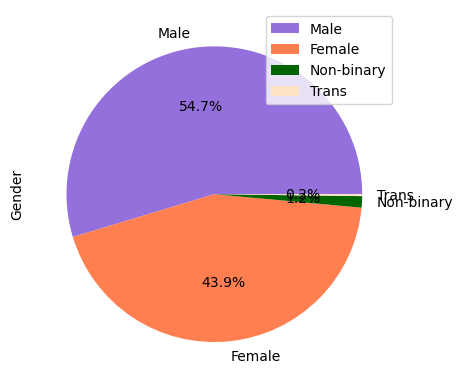

<Figure size 640x480 with 0 Axes>

In [59]:
#create labels with elements in "gender" column
gender_labels = []
for i in survey_df["gender"]:
    if i not in gender_labels:
        gender_labels.append(i)

gender_colors = ["mediumpurple", "coral", "darkgreen", "bisque"]
#create pie chart: use of Social Media by gender
gender.plot(kind = "pie", labels = gender_labels, autopct = "%1.1f%%", ylabel = "Gender", colors = gender_colors)
plt.legend(gender_labels, loc="upper right")
plt.show()
plt.savefig("output/BH_gender_pie")

# Gender Pie Chart Summary #
Our dataset had slightly more male-identifying survey participants than other genders at 54.7% followed by Females at 43.9%, Non-binary at 1.2%, and trans at 0.2%. 

In [9]:
#create stacked bar chart of social media usage by gender

#create a dataframe of social media platform by gender
platforms = ["Facebook", "Twitter", "Instagram", "YouTube", "Snapchat", "Discord", "Reddit", "Pinterest", "TikTok"]
platform_gender_dict = {"Gender":gender_labels,
                        "Facebook_count": "",
                        "Twitter_count": "",
                        "Instagram_count": "",
                        "YouTube_count": "",
                        "Snapchat_count": "",
                        "Discord_count": "",
                        "Reddit_count": "",
                        "Pinterest_count": "",
                        "TikTok_count": ""}
platform_gender_df = pd.DataFrame(platform_gender_dict)

In [10]:
platform_gender_df.set_index("Gender", inplace = True)

In [11]:
def platform_gender_fn(gendercol, platform_count, dfplatformcol):
    platform_gender_df.loc[gendercol,platform_count]=survey_df.loc[(survey_df["gender"] == gendercol) & (survey_df[dfplatformcol] == "Yes")].shape[0]

In [12]:
for index, row in platform_gender_df.iterrows():
    platform_gender_fn(index, "Facebook_count", "facebook")
    platform_gender_fn(index, "Twitter_count", "twitter")
    platform_gender_fn(index, "Instagram_count", "instagram")
    platform_gender_fn(index, "YouTube_count", "youtube")
    platform_gender_fn(index, "Snapchat_count", "snapchat")
    platform_gender_fn(index, "Discord_count", "discord")
    platform_gender_fn(index, "Reddit_count", "reddit")
    platform_gender_fn(index, "Pinterest_count", "pinterest")
    platform_gender_fn(index, "TikTok_count", "tiktok")

In [13]:
platform_gender_df = platform_gender_df.T

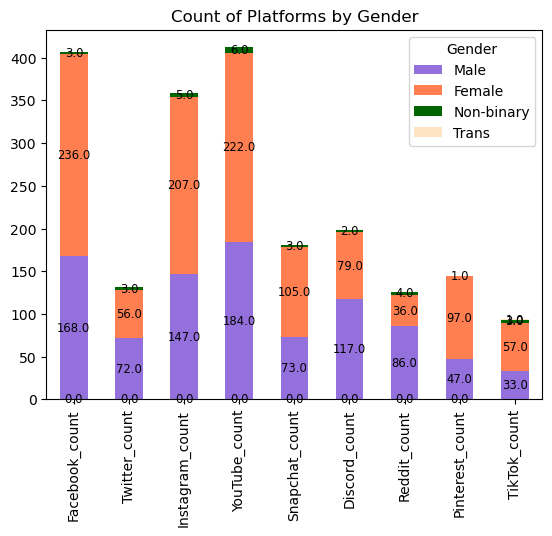

<Figure size 640x480 with 0 Axes>

In [68]:
ax_1 = platform_gender_df.plot(kind = "bar", stacked = True, legend = True, color = gender_colors)
for i in ax_1.patches:
    ax_1.text(i.get_x() + i.get_width()/2,
            i.get_y() + i.get_height()/2,
            str(i.get_height()),
             fontsize = "small",
            ha = "center", va = "center")
plt.title("Count of Platforms by Gender")
plt.show()
plt.savefig("output/BH_gender_platform_bar")

# Gender and Platform Bar Chart Summary #
The top 3 platforms that the survey participants in our dataset use are YouTube, Facebook, and Instagram. Although our sample has more males-identifying participants overall, there are more female-identifying participants that use the top 3 platforms and across all other platforms except for Twitter, Discord, and Reddit. This might mean that female-identifying participants gravitate more toward platforms designed for social networking while male-identifying participants gravitate more toward platforms designed for communications within communities. 

Note: the survey question asked participants "What social media platforms do you commonly use?" Our group parsed these answers and assigned "yes/no" values to each platform. As such, the counts on this visualization represent multiple platforms per participant and does not give any magnitude of each platform (e.g., someone can list both Instagram and Reddit but use Instagram much more).

In [92]:
#box and whiskers of age
#age 91 might be a typo - drop entire row
survey_df = survey_df.loc[survey_df["age"] != 91]
#Determine outliers
quartiles = survey_df["age"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = survey_df["age"].loc[(survey_df["age"] < lower_bound) | (survey_df["age"] > upper_bound)]
print(f"the lower bound of age is {lower_bound} and the upper bound is {upper_bound} with {len(list(outliers))} outliers: {list(outliers)}")

percentage_outliers = (len(outliers) / len(survey_df)) * 100

print(f"outliers make up {percentage_outliers:.2f}% of the dataset")

mean_age = survey_df["age"].mean()
median_age = survey_df["age"].median()
print("="*50)

print(f"the mean age of the survey is {mean_age} and median is {median_age}")

print("="*50)



the lower bound of age is 13.5 and the upper bound is 33.5 with 83 outliers: [34.0, 35.0, 35.0, 35.0, 56.0, 65.0, 40.0, 55.0, 38.0, 48.0, 47.0, 48.0, 47.0, 47.0, 34.0, 48.0, 50.0, 47.0, 38.0, 50.0, 49.0, 47.0, 48.0, 51.0, 50.0, 47.0, 40.0, 46.0, 47.0, 47.0, 48.0, 49.0, 47.0, 50.0, 48.0, 47.0, 36.0, 37.0, 48.0, 48.0, 48.0, 47.0, 47.0, 48.0, 48.0, 47.0, 35.0, 37.0, 48.0, 47.0, 45.0, 47.0, 47.0, 42.0, 35.0, 38.0, 34.0, 48.0, 37.0, 50.0, 46.0, 36.0, 69.0, 34.0, 34.0, 36.0, 43.0, 37.0, 35.0, 52.0, 44.0, 44.0, 35.0, 60.0, 49.0, 34.0, 56.0, 51.0, 50.0, 13.0, 13.0, 35.0, 53.0]
outliers make up 17.29% of the dataset
the mean age of the survey is 26.001458333333336 and median is 22.0


In [72]:
outliers_series = pd.DataFrame(outliers)
outliers_series.head()

19    34.0
25    35.0
27    35.0
31    35.0
42    56.0
Name: age, dtype: float64

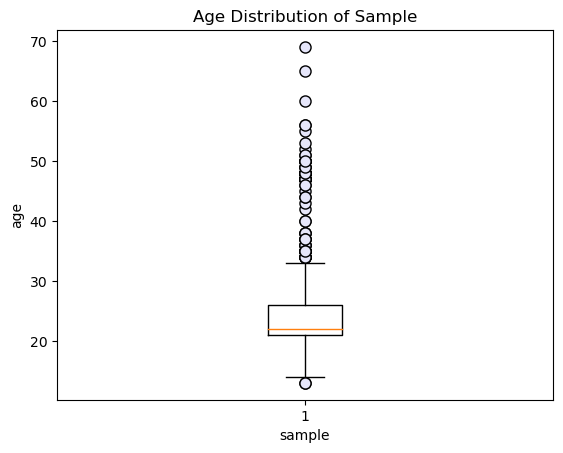

<Figure size 640x480 with 0 Axes>

In [66]:
#plot box and whiskers
flierprops = dict(marker = "o", markerfacecolor = "lavender", markeredgecolor = "black", markersize = 8)
plt.boxplot(survey_df["age"], flierprops = flierprops)
plt.xlabel("sample")
plt.ylabel("age")
plt.title("Age Distribution of Sample")
plt.show()
plt.savefig("output/BH_age_box")

In [82]:
var = np.var(survey_df["age"])
std = np.std(survey_df["age"])
sem = st.sem(survey_df["age"])

print(f"the variance of age in our data set is {var}, standard deviation is {std}, and standard error from the mean is {sem}.")
print("="*50)
print(f"there are {len(survey_df)} records in the dataset.")

the variance of age in our data set is 89.52601870659733, standard deviation is 9.461818995658145, and standard error from the mean is 0.4323215446491695.
there are 480 records in the dataset.


# Age Distribution Box and Whiskers Plot Summary #
The age distribution of the survey participants in our dataset has a relatively small standard deviation compared to the total age range (i.e., 9.5 standard deviation in a dataset with age range 13-69). This means most of the data is clustered around the mean age of 26. Additionally, the median age of the survey participants in our dataset is 22. This is consistent with the fact that the survey was conducted as part of a project for a university statistics course. There are 83 outliers out of 480 records, about 17% of all survey participants. Although the distribution of the dataset is not very large and mostly represents a younger demographic, there is still representation across a wide age range. 

It is important to keep in mind that this may not be very representative of the population as a whole and the results should not be extrapolated to draw conclusions as such.

In [17]:
# Map the bin labels using a dictionary
survey_df['avg_time_per_day'] = survey_df['avg_time_per_day'].replace({
               "Less than an Hour": '0-1',
               "Between 1 and 2 hours": '1-2',
               "Between 2 and 3 hours": '2-3', "Between 3 and 4 hours": '3-4',
               "Between 4 and 5 hours":'4-5', "More than 5 hours": '>5'})


In [75]:
#check for min age
survey_df["age"].min()

13.0

In [18]:
#check max age after dropping 91
survey_df["age"].max()

69.0

In [56]:
#bin ages
age_bins = [0, 18, 24, 30, 50, 70]
age_bin_labels = ["<18", "18-24", "25-30", "31-50", "50+"]
age_colors = ["mediumpurple", "coral", "darkgreen", "bisque", "olive"]
survey_df["Age Range"]=pd.cut(survey_df["age"], bins = age_bins, labels=age_bin_labels, include_lowest=True)               

In [51]:
#create new df for age and time
keep_col = ["ID_number", "age", "Age Range", "avg_time_per_day"]
age_time_df = survey_df[keep_col]
age_time_df

,ID_number,age,Age Range,avg_time_per_day
0,1,21.0,18-24,2-3
1,2,21.0,18-24,>5
2,3,21.0,18-24,3-4
3,4,21.0,18-24,>5
4,5,21.0,18-24,2-3
...,...,...,...,...
476,477,24.0,18-24,2-3
477,478,26.0,25-30,1-2
478,479,29.0,25-30,2-3
479,480,21.0,18-24,2-3


In [21]:
#calculate counts of observations for each combination of bins:
age_time_combo = pd.crosstab(age_time_df["Age Range"],age_time_df["avg_time_per_day"])
#transpose age time combo to get avg time on y-axis when plotting
age_time_combo = age_time_combo.T
age_time_combo

Age Range,<18,18-24,25-30,31-50,50+
avg_time_per_day,,,,,
0-1,1,10,3,19,1
1-2,2,27,11,25,5
2-3,7,61,13,17,2
3-4,7,66,10,9,1
4-5,6,43,13,5,0
>5,9,89,14,3,1


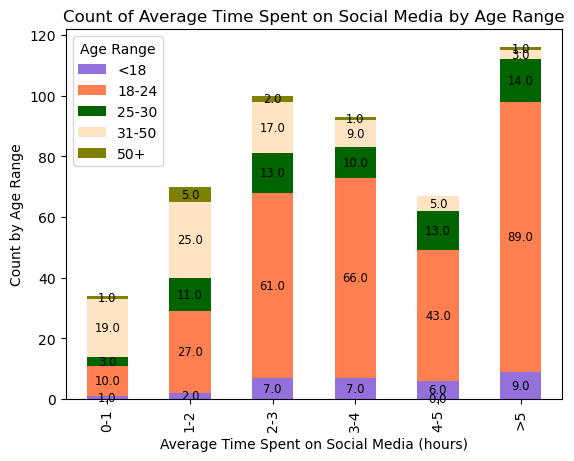

In [65]:
#create stacked bar chart of avg. time spent on social media by age
ax = age_time_combo.plot(kind="bar", stacked = True, color = age_colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2,
            i.get_y() + i.get_height()/2,
            str(i.get_height()),
             fontsize = "small",
            ha = "center", va = "center")

plt.xlabel("Average Time Spent on Social Media (hours)")
plt.ylabel("Count by Age Range")
plt.title("Count of Average Time Spent on Social Media by Age Range")
plt.savefig("output/BH_time_age_bar")

In [146]:
percent_list_18under = []
percent_list_18to24 = []
percent_list_25to30 = []
percent_list_31to50 = []
percent_list_50plus = []
for index, row in age_time_combo.iterrows():
    a_under_18 = f"{round(row[0]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    b_18to24 = f"{round(row[1]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    c_25to30 = f"{round(row[2]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    d_31to50 = f"{round(row[3]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    d_50plus = f"{round(row[4]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    percent_list_18under.append(a_under_18)
    percent_list_18to24.append(b_18to24)
    percent_list_25to30.append(c_25to30)
    percent_list_31to50.append(d_31to50)
    percent_list_50plus.append(d_50plus)

['2.94%', '2.86%', '7.0%', '7.53%', '8.96%', '7.76%']

In [168]:
#create list of overall age % represented in dataset
agecount_df = pd.DataFrame(survey_df.groupby("Age Range").size())
agecount_df["percent of total"]=""
agecount_df
for index, row in agecount_df.iterrows():
    agecount_df.loc[index,"percent of total"] = f"{round((row[0]/len(survey_df))*100,2)}%"
age_percent_list = list(agecount_df["percent of total"])      
agecount_df

,0,percent of total
Age Range,,
<18,32,6.67%
18-24,296,61.67%
25-30,64,13.33%
31-50,78,16.25%
50+,10,2.08%


In [167]:
age_percent_list

['6.67%', '61.67%', '13.33%', '16.25%', '2.08%']

In [180]:
#create dataframe for % of each age range by average time per day to compare to representation of that age range in overall dataset
atp_dict = {"avg_time_per_day":age_time_combo.index,
            "<18": percent_list_18under,
            "18-24": percent_list_18to24,
            "25-30": percent_list_25to30,
            "31-50": percent_list_31to50,
            "50+": percent_list_50plus}
atp_df = pd.DataFrame(atp_dict)
atp_df.set_index("avg_time_per_day", inplace=True)
atp_df.loc[-1]= age_percent_list
atp_df.rename(index={-1: 'Total % by age in sample'}, inplace = True)
atp_df

,<18,18-24,25-30,31-50,50+
avg_time_per_day,,,,,
0-1,2.94%,29.41%,8.82%,55.88%,2.94%
1-2,2.86%,38.57%,15.71%,35.71%,7.14%
2-3,7.0%,61.0%,13.0%,17.0%,2.0%
3-4,7.53%,70.97%,10.75%,9.68%,1.08%
4-5,8.96%,64.18%,19.4%,7.46%,0.0%
>5,7.76%,76.72%,12.07%,2.59%,0.86%
Total % by age in sample,6.67%,61.67%,13.33%,16.25%,2.08%


In [115]:
age_time_combo
age_time_file = age_time_combo.to_csv("output/age_time_file.csv")

# Count of Avg. Time Spent on SM by Age Range Bar Chart Summary #
 In the bar chart of avg time spent on social media by age range, 116 out of 480 of the survey participants, or 24%, spent more than 5 hours on social media. This was the highest count of participants out of all time ranges, followed by the 2-3 hour and 3-4 hour ranges at 21% and 19% respectively. The vast majority  (77%) of those that said they spent 5+ hours on social media fell within the 18-24 age range, even though they only represent 62% of the total dataset. 

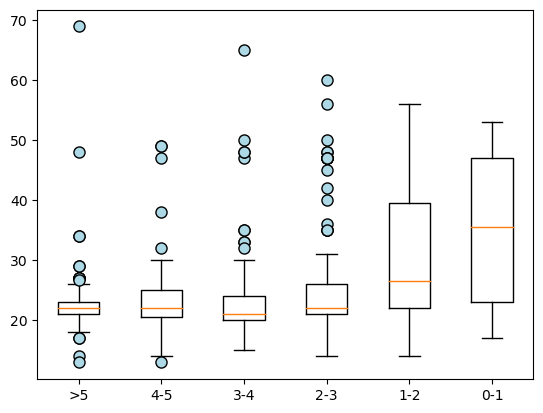

In [23]:
#TBD: is this even useful? box and whiskers of age by social media usage
#not used in presentation

avg_time_count = age_time_df["avg_time_per_day"].value_counts()
avg_time_df=pd.DataFrame(avg_time_count)
avg_time_df.sort_index(ascending=False, inplace=True)
avg_time_list = list(avg_time_df.index)
avg_time_list

age_list = []

for time in avg_time_list:
    #locate the rows which contain student on each time and get age
    student_age = age_time_df.loc[age_time_df["avg_time_per_day"] == time, "age"]
    age_list.append(student_age)
                                  
    #Determine outliers
    quartiles_bytime = age_time_df["age"].quantile([0.25, 0.5, 0.75])
    lowerq_bytime = quartiles[0.25]
    upperq_bytime = quartiles[0.75]
    iqr_bytime = upperq_bytime-lowerq_bytime
    lower_bound_bytime = lowerq_bytime - (1.5*iqr_bytime)
    upper_bound_bytime = upperq_bytime + (1.5*iqr_bytime)

    outliers_bytime = age_time_df["age"].loc[(age_time_df["age"] < lower_bound_bytime) | (age_time_df["age"] > upper_bound_bytime)]

flierprops_bytime = dict(marker="o", markerfacecolor = "red", markersize = 12)
plt.boxplot(age_list, labels = avg_time_list, flierprops = flierprops)
plt.show()

In [24]:
#create occupation labels
occupation = survey_df["occupation_status"].value_counts()
occupation_series = pd.Series(occupation)

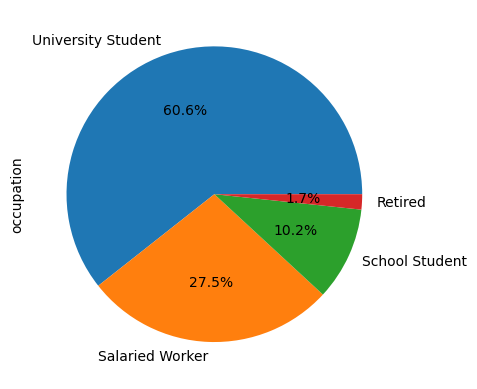

In [25]:
#not used in presentation
#create pie chart: occupation summary
occupation_series.plot(kind = "pie", labels = occupation_series.index, autopct = "%1.1f%%", ylabel = "occupation")
plt.show()

In [ ]:
#plot avg. time spent groupby age

#time_spent = survey_df.groupby("age")

#create age bins
age_bins = [0, 18, 24, 30, 50, 92]
age_bin_labels = ["<18", "18-24", "25-30", "31-50", "50+"]

# #create dictionary for age_time df
# age_time_dict = {"age_range":age_bins,
#                "More than 5 hours":"",
#                "Between 4 and 5 hours":"",
#                "Between 3 and 4 hours":"",
#                 "Between 2 and 3 hours":"",
#                "Between 1 and 2 hours":"",
#                "Less than an Hour":""}
# #create dataframe
# age_time_df = pd.DataFrame(age_time_dict)
               
# age_time_df["Age Range"]=pd.cut(survey_df["age"], bins = age_bins, labels=age_labels, include_lowest=True)               
# #create labels for time spent